In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import matplotlib.colors as mcolors
import matplotlib.markers as mmarkers
import math
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import pickle as pkl
import seaborn as sns

In [2]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-white')
plt.rcParams['font.family'] = 'Arial'
plt.rc('axes', linewidth=0.5)

MCOLORS = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#AA3377', '#66CCEE', '#BBBBBB', '#000000']*3

MARKERS = ['o', '^', 's', 'P', '<', 'x', '>', 'D', 'v', 'o', '^', 's', 'P', '<', 'X', '>', 'D', 'v', 'o', '^', 's', 'P', '<', 'X', '>', 'D', 'v']


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
def read_lines(file):
    with open(file, 'r') as fin:
        lines = fin.readlines()
    lines = [line.strip() for line in lines]
    return lines

def get_index_of(x, list):
    ret = -1
    for index, elem in enumerate(list):
        if x == elem:
            ret = index
    return ret

def read_pkl(pkl_file):
    with open(pkl_file, 'rb') as fin:
        s = pkl.load(fin)
    return s

In [4]:
def plot_savefig(DIR, filename=None, name=None):
    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.jpg", format="jpg", dpi=300, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
        
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.jpg", format="jpg", dpi=300, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)

        print(f"{os.path.join(DIR, name)} png and jpg")
    

def plot_file_advanced(file,
              sep=',', 
              x='x', 
              ys={'y':['y1', 'y2']}, 
              labels=['E_DNA', 'E_Ideal'],
              xlabel='Time (hours)',
              ylabel='Concentration (nM)',
              linestyles=None, 
              colors=MCOLORS,
              markers=None,
              name=None,
              text=r'text',
              legendkwargs={'loc': 'best'},
              **kwargs,
             ):
    
    # Preprocess
    lines = read_lines(file)
    headers = lines[0].split()
    print(headers)
    data = {}
    
    timeindex = get_index_of(x, headers)
    times = []
    for row, line in enumerate(lines[1:]):
        times.append(float(line.split()[0]))
    data[x] = times
    
    
    for key, vlist in ys.items():
        indices = [get_index_of(v, headers) for v in vlist]
        sum_np = np.zeros((len(lines)-1, len(vlist)))
        for row, line in enumerate(lines[1:]):
            for col, index in enumerate(indices):
                sum_np[row, col] = line.split()[index]
    
        sum_np = np.sum(sum_np, axis=-1)
        data[key] = sum_np
                       
    df = pd.DataFrame(data)
    
    df['time'] /= 3600 # Convert to hours
    
    # Markers
    if (markers is None) or (markers==[]):
        markers=['']*len(ys)
    
    # Plot 
    for index, (color, y) in enumerate(zip(colors, ys)):
        kwargs_copy = kwargs.copy()
        kwargs_copy['markevery'] = kwargs['markevery'] + (-1)**random.randint(0, 2)*random.randint(0, 15)
        plt.plot(x, y, data=df, 
                 label=labels[index], 
                 color=color, 
                 marker=markers[index],
                 linestyle=linestyles[index],
                 **kwargs_copy)
        
    
    # Legend. CHANGE THIS FOR SOME PLOTS WITH LOT OF LEGEND TO BE OUTSIDE THE BOX
    plt.legend(**legendkwargs)
    
    # Setting xlabel and ylabel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Remove spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Style the axes
    ax = plt.gca()
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='major', length=4) # Major ticks
    ax.tick_params(which='minor', length=2) # Minor ticks
    
    # Get the directory
    DIR = os.path.dirname(file)
    filename = os.path.basename(file)

    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.jpg", format="jpg", dpi=300, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
        
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.jpg", format="jpg", dpi=300, bbox_inches='tight', pad_inches=0)
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)

        print(f"{os.path.join(DIR, name)} png and jpg")
    return df

# Plot the dataset

In [5]:
TRAIN_PKL_FILE = 'data/rings/train.pkl'
VAL_PKL_FILE = 'data/rings/val.pkl'

In [6]:
def dataset_pickle2df(pkl_file):
    data = read_pkl(pkl_file)
    pd_data = []
    
    DIMS = -1
    
    for item in data:
        # Each item is a tuple (x=[Scalar], y=Scalar)
        x = item[0]
        y = item[1]
        datapoint = x + [y]
        pd_data.append(datapoint)
        DIMS = len(x)
        
    headers = [f'coord{i}' for i in range(1, DIMS+1)] + ['label']     
    df = pd.DataFrame(data=pd_data, columns=headers)
    return df

In [7]:
df = dataset_pickle2df(VAL_PKL_FILE)

<Axes: xlabel='coord1', ylabel='coord2'>

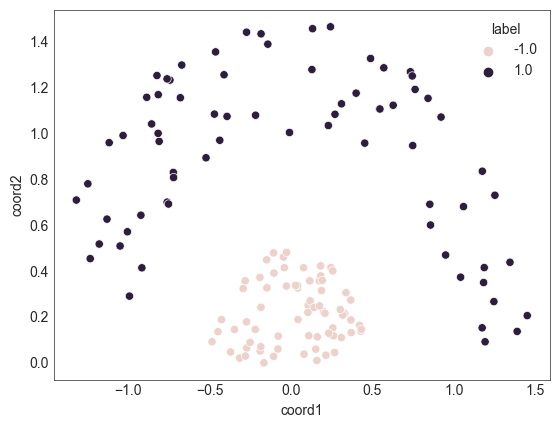

In [8]:

sns.scatterplot(x='coord1', y='coord2',data=df, hue='label')

In [9]:
df = dataset_pickle2df(TRAIN_PKL_FILE)

<Axes: xlabel='coord1', ylabel='coord2'>

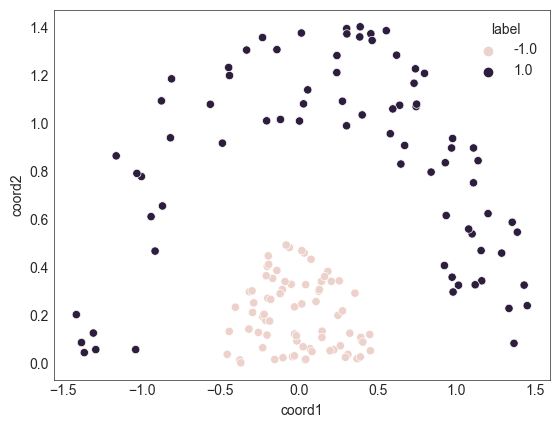

In [10]:

sns.scatterplot(x='coord1', y='coord2',data=df, hue='label')